In [63]:
import re
import numpy as np
import matplotlib.pylab as plt
from scipy.optimize import curve_fit

data = np.array([re.findall(r'([0-9.]+)',line) for line in open('battery.log')], dtype = float)[:,[0,1]]
data_c1 = data[30:85]
data_d1 = data[135:240]
data_c2 = data[253:290]
data_d2 = data[310:432]

In [94]:
def lin(x,a0,a1):
    return a0 + a1*x

def quad(x,a0,a1,a2):
    return a0 + a1*x + a2 * x**2

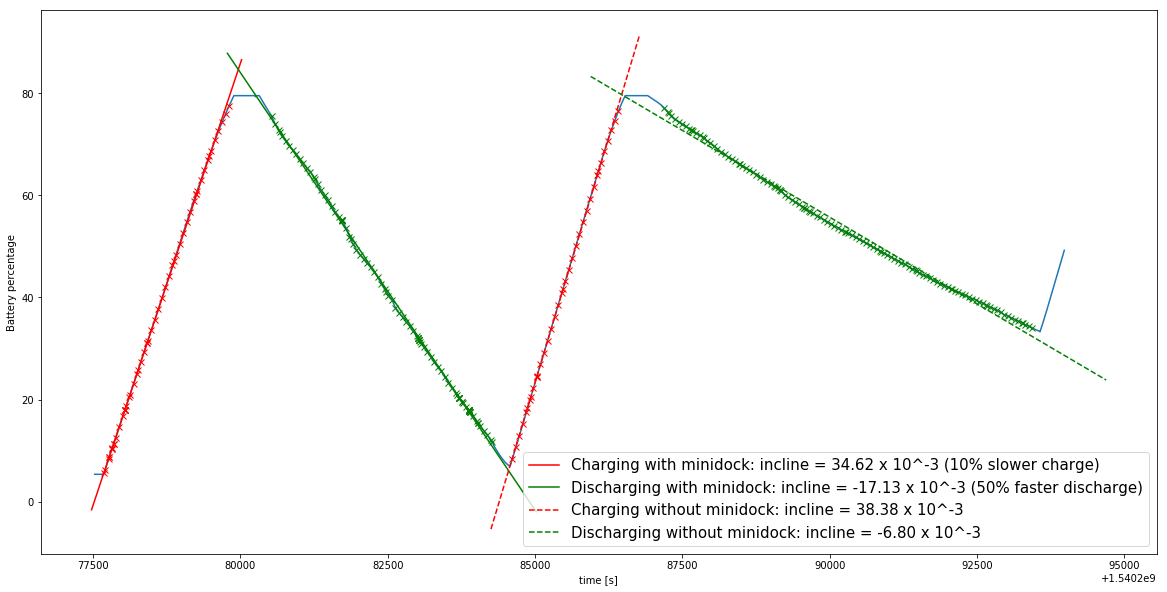

In [138]:
fig = plt.figure(figsize=(20,10))
plt.plot(data[:,0], data[:,1])

plt.plot(data_c1[:,0], data_c1[:,1], 'rx')
popt, pcov = curve_fit(lin, data_c1[:,0], data_c1[:,1])
dx = (data_c1[-1,0] - data_c1[0,0])*0.1
xr = np.array([data_c1[0,0]-dx, data_c1[-1,0]+dx])
plt.plot(xr, lin(xr, *popt),'r', label = f'Charging with minidock: incline = {popt[1]*1000:.2f} x 10^-3 (10% slower charge)')
plt.xlabel('time [s]')
plt.ylabel('Battery percentage')

plt.plot(data_d1[:,0], data_d1[:,1], 'gx')
popt, pcov = curve_fit(lin, data_d1[:,0], data_d1[:,1])
dx = (data_d1[-1,0] - data_d1[0,0])*0.2
xr = np.array([data_d1[0,0]-dx, data_d1[-1,0]+dx])
plt.plot(xr, lin(xr, *popt),'g', label = f'Discharging with minidock: incline = {popt[1]*1000:.2f} x 10^-3 (50% faster discharge)')

plt.plot(data_c2[:,0], data_c2[:,1], 'rx')
popt, pcov = curve_fit(lin, data_c2[:,0], data_c2[:,1])
dx = (data_c2[-1,0] - data_c2[0,0])*0.2
xr = np.array([data_c2[0,0]-dx, data_c2[-1,0]+dx])
plt.plot(xr, lin(xr, *popt),'r--', label = f'Charging without minidock: incline = {popt[1]*1000:.2f} x 10^-3')

plt.plot(data_d2[:,0], data_d2[:,1], 'gx')
popt, pcov = curve_fit(lin, data_d2[:,0], data_d2[:,1])
dx = (data_d2[-1,0] - data_d2[0,0])*0.2
xr = np.array([data_d2[0,0]-dx, data_d2[-1,0]+dx])
plt.plot(xr, lin(xr, *popt),'g--', label = f'Discharging without minidock: incline = {popt[1]*1000:.2f} x 10^-3')

plt.legend(loc=4, prop={'size':15})

In [127]:
(34.62-38.38)/34.62 *100

-10.86077411900637

In [131]:
(-17.13+6.8)/(-6.8)*100 - 100

51.91176470588232